In [31]:
import sys
import importlib as imp
sys.path.insert(0, r"C:\users\pairwin\Documents\Github\HelperPI")
#sys.path.insert(0, r'/home/pirwin/Git/HelperPI')
#imp.reload(HelperPI)
import HelperPI
import itertools
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from scipy.special import inv_boxcox
from scipy.stats.distributions import uniform, lognorm
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.formula.api as sts
import numpy as np
import math
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
#from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
#from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from scipy import interp
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, LassoLars, HuberRegressor, ElasticNet, Ridge
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from time import time
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest, f_regression

In [4]:
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (11,8)

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [6]:
helper = HelperPI.Helper()

INFO:root:Initializing...


In [69]:
impdata = pd.read_excel(r'B:\Phillip\Mapping\CBSA_Analysis\Modeling\ModelDataV3.xlsx')

In [70]:
mean = np.mean(impdata['TARGET_SALESPOS'])
std = np.std(impdata['TARGET_SALESPOS'])
mean, std

base = impdata[impdata['TARGET_SALESPOS'] < mean+std*10]

#base['SALES_TARGET_N12_CBRT'], lmda = stats.boxcox(base['SALES_TARGET_N12'])
base.describe()

,STORE_ID,TARGET_SALESPOS,AVG_HH_SIZE,BPS_IND,DIVIND,MEDAGE,MEDDISINC_2018,PARKS_SQMI,PCAP_AFFH_NAICS,PCAP_CAMPEQUIP,PCAP_CAMPFEES,PCAP_CC_DEBT,PCAP_CONTR_POL,PCAP_CONTR_RELIG,PCAP_HFEQUIP,PCAP_RTS_NAICS,PCAP_WSEQUIP,PCT_ARCHERY,PCT_ATTEND_RELIG,PCT_BOAT,PCT_COUNTRY_PERF,PCT_FFISH,PCT_GLBLWARM_WHATEVS,PCT_HH_ATV,PCT_HH_FOODSTAMPS,PCT_HH_TRUCK,PCT_HS_DIPLOMA,PCT_HUNT_RIFLE,PCT_HUNT_SHOTGUN,PCT_KAYAK,PCT_MARRIED,PCT_NASCAR_SUPFAN,PCT_NOFOC_ENVIR,PCT_SFISH,PCT_TARGET,PCT_WATCH_FISHING,PCT_WATCH_FOXNEWS,PCT_WATCH_NASCAR,PCT_WATCH_OUTDOOR,PCT_WATCH_WWE,POPGRWTH,STORES_WITHIN_40MIN,TOTHH_2018,TOTPOP_2018,WATER_SQMI,STORE_SQFT
count,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,1.490000e+02,149.000000,149.000000
mean,244.711409,2.501457e+07,2.561812,0.496644,54.424161,37.684564,48269.087248,830.814617,0.202734,5.450162,11.791262,219.514532,6.445136,362.407118,20.318373,17.121137,2.468024,0.020664,0.153118,0.041191,0.052122,0.091688,0.092210,0.053976,0.122267,0.247391,0.148735,0.031879,0.025538,0.052323,0.395905,0.020840,0.053381,0.029473,0.035011,0.036430,0.195581,0.081855,0.024378,0.038370,0.992081,0.389262,4.766812e+05,1.267553e+06,1287.392886,94656.812081
std,202.307242,8.603626e+06,0.197221,0.501675,16.518334,3.349117,7442.861684,1894.399062,0.332031,0.936117,2.974957,34.851436,1.286879,49.422118,3.145220,2.582660,0.438461,0.002242,0.005112,0.004722,0.005015,0.016821,0.007822,0.017418,0.037390,0.040902,0.031237,0.008222,0.005413,0.006123,0.027854,0.002185,0.003327,0.002710,0.003413,0.005205,0.018501,0.015246,0.006749,0.003530,0.652475,0.633645,3.725656e+05,1.020824e+06,4428.659094,56370.646325
min,1.000000,1.009142e+07,2.280000,0.000000,15.900000,29.200000,32924.000000,0.000000,0.012742,2.554217,5.055199,107.956969,3.468858,199.310225,8.908127,9.478178,1.348784,0.013783,0.133018,0.025497,0.032786,0.048733,0.064301,0.030310,0.040331,0.157835,0.086969,0.015063,0.013318,0.029635,0.321826,0.015823,0.042500,0.023187,0.022505,0.022635,0.121271,0.049169,0.010669,0.027519,-0.420000,0.000000,6.276000e+03,1.449800e+04,0.000000,24523.000000
25%,40.000000,1.913207e+07,2.440000,0.000000,45.000000,35.700000,42996.000000,2.225820,0.050127,4.833828,9.902781,196.218751,5.623851,330.764120,18.257546,15.708350,2.182522,0.019363,0.150394,0.038662,0.049844,0.080421,0.087562,0.042836,0.095727,0.222131,0.127577,0.025727,0.021938,0.049420,0.380102,0.019403,0.051407,0.027760,0.033101,0.033731,0.187807,0.070542,0.018766,0.035781,0.480000,0.000000,1.649960e+05,4.377720e+05,28.320000,53541.000000
50%,402.000000,2.391114e+07,2.520000,0.000000,56.200000,37.400000,47289.000000,20.091890,0.098017,5.276319,11.312235,215.521471,6.157326,357.883913,20.491240,16.852021,2.404092,0.020628,0.152853,0.041334,0.052352,0.090439,0.091497,0.050657,0.118543,0.241120,0.142039,0.031207,0.025006,0.052498,0.392778,0.020557,0.053505,0.029400,0.035454,0.036315,0.195611,0.080916,0.023215,0.037910,1.000000,0.000000,3.969820e+05,1.018965e+06,76.230000,79617.000000
75%,442.000000,3.110242e+07,2.630000,1.000000,64.900000,39.400000,51810.000000,145.672660,0.193831,6.031563,13.288211,239.630634,7.215735,392.702153,22.346405,18.412216,2.743072,0.022094,0.156152,0.043405,0.054973,0.100343,0.095492,0.059007,0.140282,0.262691,0.168920,0.035882,0.027968,0.055662,0.410819,0.022456,0.055128,0.031555,0.037143,0.039316,0.204791,0.092073,0.028009,0.040668,1.460000,1.000000,7.112760e+05,1.870273e+06,208.390000,131591.000000
max,484.000000,5.856350e+07,3.450000,1.000000,86.200000,48.500000,86693.000000,10307.454670,2.023619,9.293261,25.082239,353.906574,11.579367,587.287202,3

In [71]:
base['TARGET_SALESPOS'].describe()

count    1.490000e+02
mean     2.501457e+07
std      8.603626e+06
min      1.009142e+07
25%      1.913207e+07
50%      2.391114e+07
75%      3.110242e+07
max      5.856350e+07
Name: TARGET_SALESPOS, dtype: float64

In [73]:
collist = ['TARGET_SALESPOS','AVG_HH_SIZE','BPS_IND','DIVIND','MEDAGE','MEDDISINC_2018','PARKS_SQMI','PCAP_AFFH_NAICS',
           'PCAP_CAMPEQUIP','PCAP_CAMPFEES','PCAP_CC_DEBT','PCAP_CONTR_POL','PCAP_CONTR_RELIG','PCAP_HFEQUIP',
           'PCAP_RTS_NAICS','PCAP_WSEQUIP','PCT_ARCHERY','PCT_ATTEND_RELIG','PCT_BOAT','PCT_COUNTRY_PERF',
           'PCT_FFISH','PCT_GLBLWARM_WHATEVS','PCT_HH_ATV','PCT_HH_FOODSTAMPS','PCT_HH_TRUCK','PCT_HS_DIPLOMA',
           'PCT_HUNT_RIFLE','PCT_HUNT_SHOTGUN','PCT_KAYAK','PCT_MARRIED','PCT_NASCAR_SUPFAN','PCT_NOFOC_ENVIR',
           'PCT_SFISH','PCT_TARGET','PCT_WATCH_FISHING','PCT_WATCH_FOXNEWS','PCT_WATCH_NASCAR','PCT_WATCH_OUTDOOR',
           'PCT_WATCH_WWE','POPGRWTH','STORES_WITHIN_40MIN','TOTHH_2018','TOTPOP_2018','WATER_SQMI','STORE_SQFT']

collist_X = ['AVG_HH_SIZE','BPS_IND','DIVIND','MEDAGE','MEDDISINC_2018','PARKS_SQMI','PCAP_AFFH_NAICS',
           'PCAP_CAMPEQUIP','PCAP_CAMPFEES','PCAP_CC_DEBT','PCAP_CONTR_POL','PCAP_CONTR_RELIG','PCAP_HFEQUIP',
           'PCAP_RTS_NAICS','PCAP_WSEQUIP','PCT_ARCHERY','PCT_ATTEND_RELIG','PCT_BOAT','PCT_COUNTRY_PERF',
           'PCT_FFISH','PCT_GLBLWARM_WHATEVS','PCT_HH_ATV','PCT_HH_FOODSTAMPS','PCT_HH_TRUCK','PCT_HS_DIPLOMA',
           'PCT_HUNT_RIFLE','PCT_HUNT_SHOTGUN','PCT_KAYAK','PCT_MARRIED','PCT_NASCAR_SUPFAN','PCT_NOFOC_ENVIR',
           'PCT_SFISH','PCT_TARGET','PCT_WATCH_FISHING','PCT_WATCH_FOXNEWS','PCT_WATCH_NASCAR','PCT_WATCH_OUTDOOR',
           'PCT_WATCH_WWE','POPGRWTH','STORES_WITHIN_40MIN','TOTHH_2018','TOTPOP_2018','WATER_SQMI','STORE_SQFT']

#collist_y = ['SALES_TARGET_N12_CBRT']

collist_y = ['TARGET_SALESPOS']

In [75]:
train, test = helper.splitData(base[collist], .8)

train, val = helper.splitData(train, 0.5)

print(train.shape, val.shape, test.shape)

train_X = train[collist_X]

train_y = train[collist_y].to_numpy().ravel()
val_X = val[collist_X]
val_y = val[collist_y].to_numpy().ravel()
test_X = test[collist_X]
test_y = test[collist_y].to_numpy().ravel()

interactions = helper.find_iteractions(train_X, train_y)
interactions.to_csv('interactions.csv')

(59, 45) (60, 45) (30, 45)


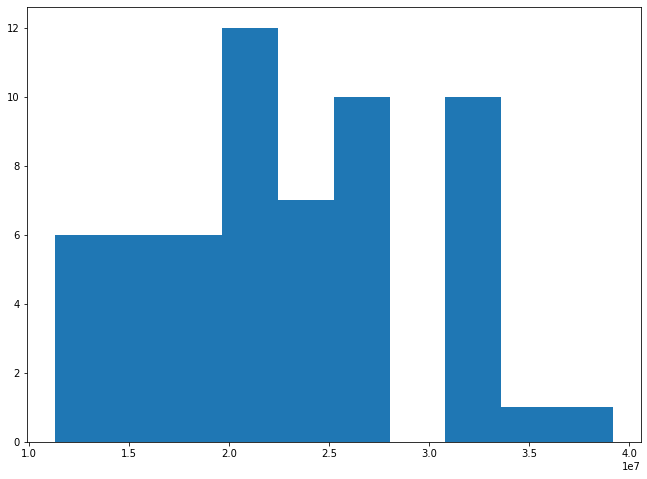

In [76]:
plt.hist(train_y, bins = 10)
plt.show()

In [77]:
collist_X = ['AVG_HH_SIZE','BPS_IND','DIVIND','MEDAGE','MEDDISINC_2018','PARKS_SQMI','PCAP_AFFH_NAICS',
           'PCAP_CAMPEQUIP','PCAP_CAMPFEES','PCAP_CC_DEBT','PCAP_CONTR_POL','PCAP_CONTR_RELIG','PCAP_HFEQUIP',
           'PCAP_RTS_NAICS','PCAP_WSEQUIP','PCT_ARCHERY','PCT_ATTEND_RELIG','PCT_BOAT','PCT_COUNTRY_PERF',
           'PCT_FFISH','PCT_GLBLWARM_WHATEVS','PCT_HH_ATV','PCT_HH_FOODSTAMPS','PCT_HH_TRUCK','PCT_HS_DIPLOMA',
           'PCT_HUNT_RIFLE','PCT_HUNT_SHOTGUN','PCT_KAYAK','PCT_MARRIED','PCT_NASCAR_SUPFAN','PCT_NOFOC_ENVIR',
           'PCT_SFISH','PCT_TARGET','PCT_WATCH_FISHING','PCT_WATCH_FOXNEWS','PCT_WATCH_NASCAR','PCT_WATCH_OUTDOOR',
           'PCT_WATCH_WWE','POPGRWTH','STORES_WITHIN_40MIN','TOTHH_2018','TOTPOP_2018','WATER_SQMI','STORE_SQFT']

#imr = SimpleImputer(strategy='median')
#imr = imr.fit(train_X)

#train_X = pd.DataFrame(imr.transform(train_X.values), columns = collist_X)
#val_X = pd.DataFrame(imr.transform(val_X.values), columns = collist_X)
#test_X = pd.DataFrame(imr.transform(test_X.values), columns = collist_X)

#stdsc = StandardScaler()
#stdsc.fit(train_X)

#train_X = pd.DataFrame(stdsc.transform(train_X), columns = collist_X)
#val_X = pd.DataFrame(stdsc.transform(val_X), columns = collist_X)
#test_X = pd.DataFrame(stdsc.transform(test_X), columns = collist_X)


for var in collist_X:
    name = var + '_cbrt'
    train_X[name] = np.cbrt(train_X[var])
    val_X[name] = np.cbrt(val_X[var])
    test_X[name] = np.cbrt(test_X[var])
    name = var + '_sq'
    train_X[name] = np.power(train_X[var], 2)
    val_X[name] = np.power(val_X[var], 2)
    test_X[name] = np.power(test_X[var], 2)
   
    
collist_X_expanded = train_X.columns.values

In [78]:
collist_X_expanded = collist_X_expanded.tolist()

In [79]:
missing_df = train_X.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train_X.shape[0]
missing_df.loc[missing_df['missing_ratio']>0.01]


,column_name,missing_count,missing_ratio


Anderson-Darling: 0.4312876295218686 Critical Value: 0.742 
train_y is normally distributed


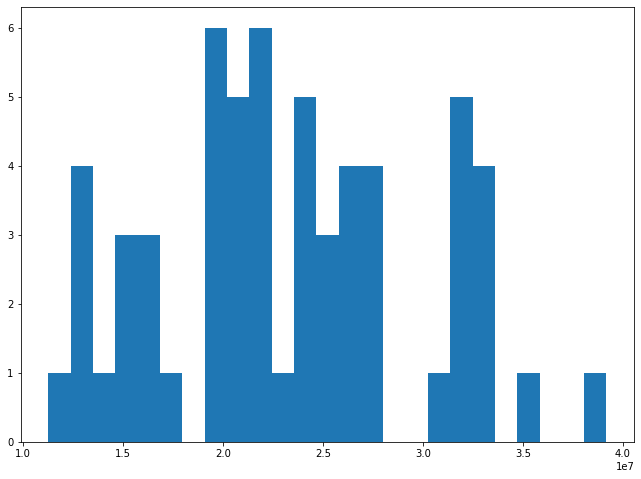

In [80]:
stat, cv, sig = stats.anderson(train_y, 'norm')
print('Anderson-Darling: {} Critical Value: {} '.format(stat, cv[2]))
if stat > cv[2]:
    print('train_y is not normally distributed')
else:
    print('train_y is normally distributed')
plt.hist(train_y, bins=25)
plt.show()

In [81]:
matplotlib.rcParams['figure.figsize'] = (5,2)

#collist_X_expanded.remove('VISITS_LT_sqrt')
#collist_X_expanded.remove('YOY_TREND_log')


train_X = train_X[collist_X_expanded]

collist_X_expanded = sorted(collist_X_expanded, key=str.lower)



for var in collist_X_expanded: 
    vardf = train_X[var]
    #print(vardf.head())
    coef, pval = stats.pearsonr(vardf.to_numpy(), train_y)
    print('%50s Corr Coef: %7s - pval:  %.4f' % (var, str(round(coef,2)), pval))
    #plt.hist(train_X[var], bins = 100)
    #plt.show()
    
matplotlib.rcParams['figure.figsize'] = (11,8)

                                       AVG_HH_SIZE Corr Coef:    0.13 - pval:  0.3166
                                  AVG_HH_SIZE_cbrt Corr Coef:    0.14 - pval:  0.2978
                                    AVG_HH_SIZE_sq Corr Coef:    0.13 - pval:  0.3450
                                           BPS_IND Corr Coef:    0.03 - pval:  0.7976
                                      BPS_IND_cbrt Corr Coef:    0.03 - pval:  0.7976
                                        BPS_IND_sq Corr Coef:    0.03 - pval:  0.7976
                                            DIVIND Corr Coef:    0.27 - pval:  0.0364
                                       DIVIND_cbrt Corr Coef:    0.29 - pval:  0.0265
                                         DIVIND_sq Corr Coef:    0.24 - pval:  0.0668
                                            MEDAGE Corr Coef:   -0.02 - pval:  0.8905
                                       MEDAGE_cbrt Corr Coef:   -0.02 - pval:  0.8823
                                         MEDAGE_sq Cor

In [82]:
collist_X_expanded = ['DIVIND_cbrt','MEDDISINC_2018_cbrt','PCAP_CAMPEQUIP_cbrt','PCAP_CAMPFEES_cbrt',
                      'PCAP_CC_DEBT_cbrt','PCAP_CONTR_POL_cbrt','PCAP_CONTR_RELIG_cbrt','PCAP_HFEQUIP_cbrt',
                      'PCAP_WSEQUIP_cbrt','PCT_ARCHERY_sq','PCT_ATTEND_RELIG_sq','PCT_FFISH_sq','PCT_HH_ATV_cbrt',
                      'PCT_HH_FOODSTAMPS','PCT_HH_TRUCK_cbrt','PCT_HUNT_RIFLE','PCT_HUNT_SHOTGUN',
                      'PCT_NASCAR_SUPFAN_cbrt','PCT_NOFOC_ENVIR_cbrt','PCT_WATCH_FISHING_sq',
                      'PCT_WATCH_NASCAR_sq','PCT_WATCH_OUTDOOR_sq','PCT_WATCH_WWE_sq','POPGRWTH',
                      'STORE_SQFT_cbrt','STORES_WITHIN_40MIN_sq','TOTHH_2018_cbrt','TOTPOP_2018_cbrt']
train_X = train_X[collist_X_expanded]

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


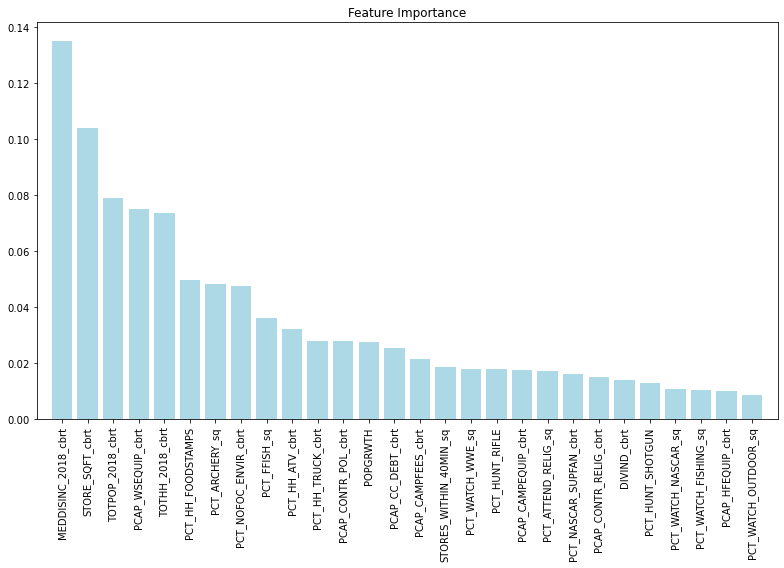

In [83]:
feat_labels = np.asarray(collist_X_expanded)

forests = RandomForestRegressor(n_estimators=500,
                                random_state=0,
                                n_jobs=-1)
forests.fit(train_X, train_y)
importances = forests.feature_importances_
indices = np.argsort(importances)[::-1]
# for f in range(train_X2.shape[1]):
#     print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]],
#                                       importances[indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(train_X.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(train_X.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, train_X.shape[1]])
plt.tight_layout()
plt.show()

In [84]:
slct = SelectKBest(f_regression, k=15)
slct.fit(train_X, train_y)
selected = slct.get_support()
feat_labels2 = feat_labels[selected]
feat_labels2

array(['MEDDISINC_2018_cbrt', 'PCAP_CAMPEQUIP_cbrt', 'PCAP_CAMPFEES_cbrt',
       'PCAP_CC_DEBT_cbrt', 'PCAP_CONTR_POL_cbrt',
       'PCAP_CONTR_RELIG_cbrt', 'PCAP_HFEQUIP_cbrt', 'PCAP_WSEQUIP_cbrt',
       'PCT_FFISH_sq', 'PCT_HH_ATV_cbrt', 'PCT_HH_FOODSTAMPS',
       'PCT_HUNT_RIFLE', 'PCT_WATCH_OUTDOOR_sq', 'TOTHH_2018_cbrt',
       'TOTPOP_2018_cbrt'], dtype='<U22')

      VIF Factor               feature
1   29001.668939   PCAP_CAMPEQUIP_cbrt
4   24000.860153     PCAP_HFEQUIP_cbrt
5   15108.789820     PCAP_WSEQUIP_cbrt
11  12851.370139       TOTHH_2018_cbrt
12  12786.439763      TOTPOP_2018_cbrt
0   11753.681009   MEDDISINC_2018_cbrt
3   10732.909055   PCAP_CONTR_POL_cbrt
2    6651.658373    PCAP_CAMPFEES_cbrt
7    2858.023631       PCT_HH_ATV_cbrt
9    1401.871582        PCT_HUNT_RIFLE
6     297.996024          PCT_FFISH_sq
10    182.666355  PCT_WATCH_OUTDOOR_sq
8      53.231745     PCT_HH_FOODSTAMPS


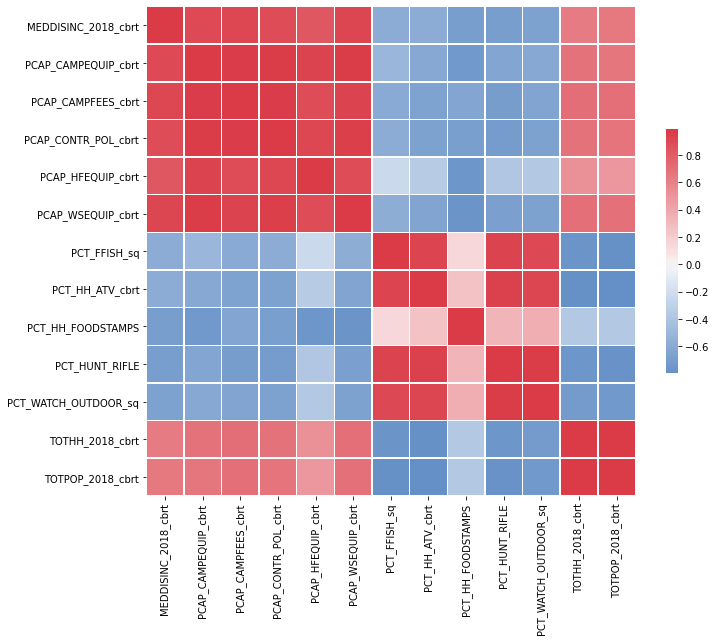

In [109]:
collist_X2 = ['MEDDISINC_2018_cbrt', 'PCAP_CAMPEQUIP_cbrt', 'PCAP_CAMPFEES_cbrt',
       'PCAP_CONTR_POL_cbrt',
        'PCAP_HFEQUIP_cbrt', 'PCAP_WSEQUIP_cbrt',
       'PCT_FFISH_sq', 'PCT_HH_ATV_cbrt', 'PCT_HH_FOODSTAMPS',
       'PCT_HUNT_RIFLE', 'PCT_WATCH_OUTDOOR_sq', 'TOTHH_2018_cbrt',
       'TOTPOP_2018_cbrt']

#collist_X2 = feat_labels2.tolist()

train_X2 = train_X[collist_X2]
    
corr = train_X2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


print(helper.calc_VIFs(train_X2))

In [102]:
import statsmodels.api as sm

mod = sm.OLS(train_y, train_X2)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                              352.8
Date:                Tue, 18 Aug 2020   Prob (F-statistic):                    2.53e-36
Time:                        09:10:07   Log-Likelihood:                         -998.51
No. Observations:                  59   AIC:                                      2003.
Df Residuals:                      56   BIC:                                      2009.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [103]:
param_test1 = {
     'learning_rate':uniform(0.01,0.09),
     'max_depth':list(range(5,20)),
     'min_child_weight':list(range(1,10)),
     'colsample_bytree': uniform(0.5,0.4),
     'subsample': uniform(0.5,0.4),
     'reg_alpha': uniform(0.1, 0.9),
     'reg_lambda': uniform(0.1, 0.9),
     'objective':['reg:squarederror'],
     'gamma':lognorm(0.1, 1.0),
     'n_estimators':range(10,200,2)
}


gsearch1 = RandomizedSearchCV(estimator = xgb.XGBRegressor(), 
                              param_distributions = param_test1, 
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              n_iter=500,
                              cv=5)
start = time()
gsearch1.fit(train_X2.values, train_y)

print("Parameter search took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(gsearch1.cv_results_['params'])))

helper.report(gsearch1) 

Parameter search took 12.99 seconds for 500 candidate parameter settings.
Best Mean validation score: -29602488614856.082 (std: 58204897601823.141)
Parameters: {'colsample_bytree': 0.636264255915693, 'gamma': 1.840371246482378, 'learning_rate': 0.05327744481668497, 'max_depth': 13, 'min_child_weight': 9, 'n_estimators': 96, 'objective': 'reg:squarederror', 'reg_alpha': 0.8306540225350165, 'reg_lambda': 0.7956834439974232, 'subsample': 0.5016957787550911}


In [104]:
tuned_model = xgb.XGBRegressor( 
                        learning_rate = 0.0533,
                        n_estimators = 96,
                        max_depth = 13,
                        min_child_weight = 9,
                        subsample = 0.5017,
                        colsample_bytree = 0.6363,
                        objective = 'reg:squarederror',
                        reg_alpha= 0.8307,
                        reg_lambda = 0.7957,
                        gamma = 1.8404,
                        seed = 27)
xgbmodel = tuned_model.fit(train_X2.values, train_y, 
                 eval_set=[(train_X2.values, train_y), (val_X[collist_X2].values, val_y), (test_X[collist_X2].values, test_y)], 
                 eval_metric='rmse',
                 early_stopping_rounds=100,                 
                 verbose=True)

[0]	validation_0-rmse:2.29396e+07	validation_1-rmse:2.55587e+07	validation_2-rmse:2.86961e+07
Multiple eval metrics have been passed: 'validation_2-rmse' will be used for early stopping.

Will train until validation_2-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:2.18144e+07	validation_1-rmse:2.44594e+07	validation_2-rmse:2.76048e+07
[2]	validation_0-rmse:2.06935e+07	validation_1-rmse:2.33568e+07	validation_2-rmse:2.6553e+07
[3]	validation_0-rmse:1.97092e+07	validation_1-rmse:2.24e+07	validation_2-rmse:2.56032e+07
[4]	validation_0-rmse:1.88436e+07	validation_1-rmse:2.15598e+07	validation_2-rmse:2.47862e+07
[5]	validation_0-rmse:1.79341e+07	validation_1-rmse:2.07074e+07	validation_2-rmse:2.39245e+07
[6]	validation_0-rmse:1.70922e+07	validation_1-rmse:1.98964e+07	validation_2-rmse:2.31186e+07
[7]	validation_0-rmse:1.6352e+07	validation_1-rmse:1.91869e+07	validation_2-rmse:2.24296e+07
[8]	validation_0-rmse:1.56271e+07	validation_1-rmse:1.85603e+07	validation_2-rmse:2.17782e+07

[86]	validation_0-rmse:4.54171e+06	validation_1-rmse:9.35008e+06	validation_2-rmse:1.1989e+07
[87]	validation_0-rmse:4.52894e+06	validation_1-rmse:9.33506e+06	validation_2-rmse:1.19751e+07
[88]	validation_0-rmse:4.52235e+06	validation_1-rmse:9.32364e+06	validation_2-rmse:1.19757e+07
[89]	validation_0-rmse:4.51424e+06	validation_1-rmse:9.34073e+06	validation_2-rmse:1.19829e+07
[90]	validation_0-rmse:4.51703e+06	validation_1-rmse:9.34169e+06	validation_2-rmse:1.19908e+07
[91]	validation_0-rmse:4.51224e+06	validation_1-rmse:9.35238e+06	validation_2-rmse:1.19915e+07
[92]	validation_0-rmse:4.50438e+06	validation_1-rmse:9.3657e+06	validation_2-rmse:1.19838e+07
[93]	validation_0-rmse:4.49961e+06	validation_1-rmse:9.35657e+06	validation_2-rmse:1.19661e+07
[94]	validation_0-rmse:4.49349e+06	validation_1-rmse:9.33838e+06	validation_2-rmse:1.19501e+07
[95]	validation_0-rmse:4.49071e+06	validation_1-rmse:9.32812e+06	validation_2-rmse:1.19295e+07


In [105]:
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true3, y_pred3 = train_y, xgbmodel.predict(train_X[collist_X2].values)
y_true, y_pred = val_y, xgbmodel.predict(val_X[collist_X2].values)
y_true2, y_pred2 = test_y, xgbmodel.predict(test_X[collist_X2].values)
print('R2 Train: ' + str(r2_score(y_true3, y_pred3)))
rmse = math.sqrt(mean_squared_error(y_true3, y_pred3))
print('RMSE Train: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE Val: ' + str(rmse))
rmse = math.sqrt(mean_squared_error(y_true2, y_pred2))
print('RMSE Test: ' + str(rmse))

rmse = mean_absolute_error(y_true3, y_pred3)
print('MAE Train: ' + str(rmse))
rmse = mean_absolute_error(y_true, y_pred)
print('MAE Val: ' + str(rmse))
rmse = mean_absolute_error(y_true2, y_pred2)
print('MAE Test: ' + str(rmse))

The model is trained on the full development set.
The scores are computed on the full evaluation set.

R2 Train: 0.5214897262147595
RMSE Train: 4490710.111053824
RMSE Val: 9328123.932889976
RMSE Test: 11929485.379378386
MAE Train: 3798307.060847457
MAE Val: 7289982.544233334
MAE Test: 8329585.665600001


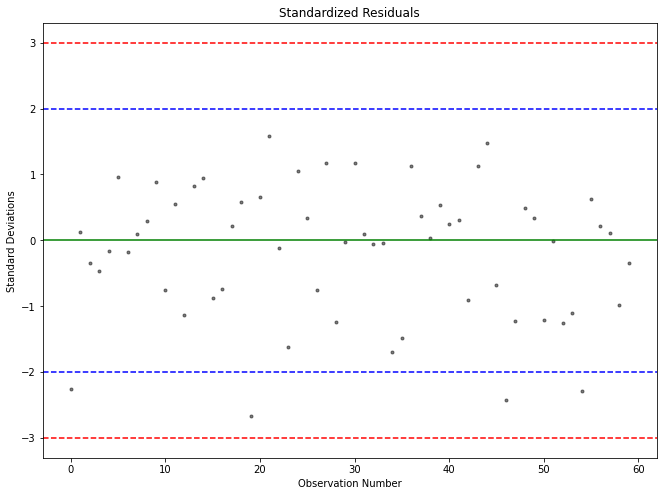

In [110]:
plotdata = pd.DataFrame({'true':y_true.tolist(),'pred':y_pred.tolist()})
plotdata['resid'] = plotdata['pred']-plotdata['true']
plotdata['stdresid'] = plotdata['resid']/np.std(plotdata['resid'])

plt.plot(plotdata['stdresid'], '.', alpha = 0.5, color='black')
plt.axhline(y=0, color = 'green')
plt.axhline(y=2, color = 'blue', linestyle='--')
plt.axhline(y=-2, color = 'blue', linestyle='--')
plt.axhline(y=3, color = 'red', linestyle='--')
plt.axhline(y=-3, color = 'red', linestyle='--')

plt.title('Standardized Residuals')
plt.ylabel('Standard Deviations')
plt.xlabel('Observation Number')
plt.show()

In [115]:
from sklearn.linear_model import RidgeCV
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1], cv=5).fit(train_X2.values, train_y)
clf.score(train_X2.values, train_y)

0.4434921834066323